In [3]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
# warnings.filterwarnings("error", category=RuntimeWarning)

from aeons.toy_samples import gaussian_samples, correlated_gaussian_samples, wedding_cake_samples
from aeons.lm_partial import analytic_lm_params, X_end_formula
from aeons.covariance import X_mu, X_Sigmainv, logX_mu, points_at_iteration
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.likelihoods import likelihood, full
from aeons.models import LS, CG
from aeons.endpoint import EndModel

from aeons.tools import pickle_dump, pickle_in

In [4]:
format = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 11pt font in plots, to match 11pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 7,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    'axes.linewidth': 0.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'patch.linewidth': 0.5,
    'legend.frameon': False
}
plt.rcParams.update(format)

Pickles;

Endpoints are lists [iterations, logXfs, logXfs_std]

#### Gaussian

In [84]:
nlive = 500
d, sigma = 30, 0.01
samples = gaussian_samples(nlive, d, sigma)
model = EndModel(samples)

In [85]:
logXf_true = model.logXf_true(200, 0.3)
logXf_true

-101.12291076324709

In [117]:
alphas = np.arange(0, 1.1, 0.1)
iterations_basic = np.linspace(100, len(samples), 10, endpoint=False).astype(int)
logXfs_basic, logXfs_std_basic = model.logXfs(iterations_basic, Nset=10)

(0.0, 130000.0)

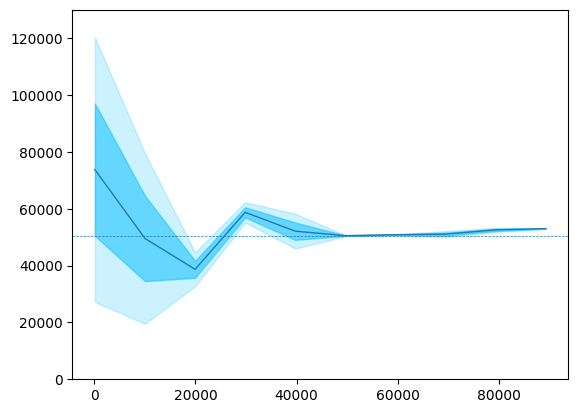

In [119]:
plt.plot(iterations_basic, logXfs_basic * (-nlive), lw=1)
plt.axhline(logXf_true * (-nlive), lw=.5, ls='--')
plt.fill_between(iterations_basic, (logXfs_basic - logXfs_std_basic) * (-nlive), (logXfs_basic + logXfs_std_basic) * (-nlive), alpha=0.5, color='deepskyblue')
plt.fill_between(iterations_basic, (logXfs_basic - 2*logXfs_std_basic) * (-nlive), (logXfs_basic + 2*logXfs_std_basic) * (-nlive), alpha=0.2, color='deepskyblue')
plt.ylim(0, 130000)

In [120]:
pickle_dump('bandwidth_endpoints/endpoints_basic_gauss.pickle', [iterations_basic, logXfs_basic, logXfs_std_basic])

In [46]:
alphas = np.arange(0, 1.1, 0.1)
iterations = np.linspace(100, len(samples), 20, endpoint=False).astype(int)
logXfs, logXfs_std = model.logXfs_bandwidth(iterations, alphas, Nset=25)

/home/zixiao/Documents/III/project/aeons/aeons/lm_partial.py:23: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/n * logsum + 1/(2*n*sigma_squared_analytic(d, X_i, logL_i)) * sum_X_2d
/home/zixiao/Documents/III/project/aeons/aeons/lm_partial.py:41: RuntimeWarning: divide by zero encountered in divide
  (Xdata**(2/d)) / (2 * sigma_squared_analytic(d, Xdata, logLdata)) )
/home/zixiao/Documents/III/project/aeons/aeons/lm_partial.py:40: RuntimeWarning: invalid value encountered in subtract
  return logLdata - (logLmax_analytic(d, Xdata, logLdata) - \
/home/zixiao/Documents/III/project/aeons/aeons/lm_partial.py:28: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(sigma_squared_analytic(d, Xdata, logLdata))
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(0.0, 55000.0)

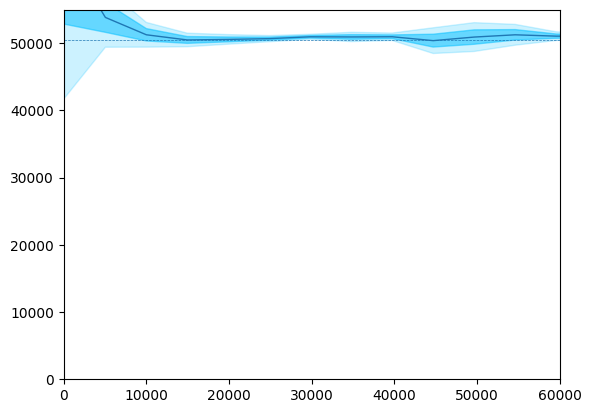

In [48]:
plt.plot(iterations, logXfs * (-nlive), lw=1)
plt.axhline(logXf_true * (-nlive), lw=.5, ls='--')
plt.fill_between(iterations, (logXfs - logXfs_std) * (-nlive), (logXfs + logXfs_std) * (-nlive), alpha=0.5, color='deepskyblue')
plt.fill_between(iterations, (logXfs - 2*logXfs_std) * (-nlive), (logXfs + 2*logXfs_std) * (-nlive), alpha=0.2, color='deepskyblue')
plt.xlim(0, 60000)
plt.ylim(0, 55000)

In [50]:
pickle_dump('bandwidth_endpoints/samples_gauss.pickle', samples)

In [49]:
pickle_dump('bandwidth_endpoints/endpoints_gauss.pickle', [iterations, logXfs, logXfs_std])

#### Wedding

In [51]:
nlive = 500
d, sigma = 20, 0.001
samples = wedding_cake_samples(nlive, d, sigma)
model = EndModel(samples)

In [54]:
logXf_true = model.logXf_true(100, 0.7)
logXf_true

-107.13015187462393

In [78]:
alphas = np.arange(0, 1.1, 0.1)
iterations_basic = np.linspace(100, len(samples), 20, endpoint=False).astype(int)
logXfs_basic, logXfs_std_basic = model.logXfs(iterations, Nset=25)

/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:22: RuntimeWarning: invalid value encountered in double_scalars
  xf_reg = gammaincinv(d/2, np.exp(logend)/gamma(d/2))
/home/zixiao/Documents/III/project/env/lib/python3.10/site-packages/scipy/special/_logsumexp.py:111: RuntimeWarning: overflow encountered in exp
  tmp = np.exp(a - a_max)
/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:19: RuntimeWarning: invalid value encountered in double_scalars
  loglive = np.log( gamma(d/2) * gammainc(d/2, Xi**(2/d)/(2*sigma**2)) )


(0.0, 65000.0)

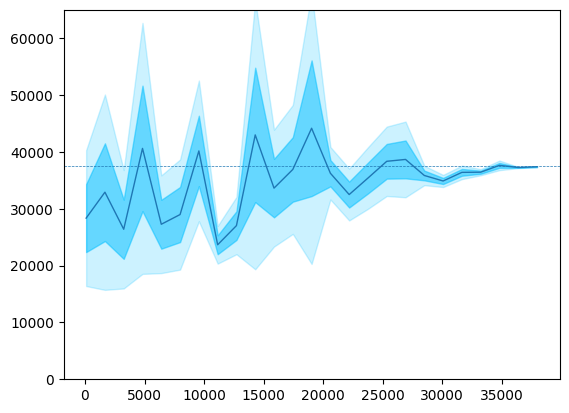

In [82]:
plt.plot(iterations, logXfs_basic * (-350), lw=1)
plt.axhline(logXf_true * (-350), lw=.5, ls='--')
plt.fill_between(iterations, (logXfs_basic - logXfs_std_basic) * (-350), (logXfs_basic + logXfs_std_basic) * (-350), alpha=0.5, color='deepskyblue')
plt.fill_between(iterations, (logXfs_basic - 2*logXfs_std_basic) * (-350), (logXfs_basic + 2*logXfs_std_basic) * (-350), alpha=0.2, color='deepskyblue')
plt.ylim(0, 65000)

In [83]:
pickle_dump('bandwidth_endpoints/endpoints_basic_wedding.pickle', [iterations_basic, logXfs_basic, logXfs_std_basic])

In [66]:
alphas = np.arange(0, 1.1, 0.1)
iterations = np.linspace(100, len(samples), 25, endpoint=False).astype(int)
logXfs, logXfs_std = model.logXfs_bandwidth(iterations, alphas, Nset=25)

/home/zixiao/Documents/III/project/aeons/aeons/endpoint.py:22: RuntimeWarning: invalid value encountered in double_scalars
  xf_reg = gammaincinv(d/2, np.exp(logend)/gamma(d/2))


(0.0, 65000.0)

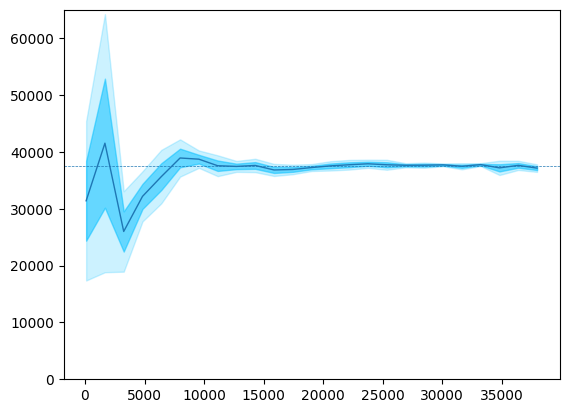

In [71]:
plt.plot(iterations, logXfs * (-350), lw=1)
plt.axhline(logXf_true * (-350), lw=.5, ls='--')
plt.fill_between(iterations, (logXfs - logXfs_std) * (-350), (logXfs + logXfs_std) * (-350), alpha=0.5, color='deepskyblue')
plt.fill_between(iterations, (logXfs - 2*logXfs_std) * (-350), (logXfs + 2*logXfs_std) * (-350), alpha=0.2, color='deepskyblue')
plt.ylim(0, 65000)

In [74]:
pickle_dump('bandwidth_endpoints/samples_wedding.pickle', samples)

In [72]:
pickle_dump('bandwidth_endpoints/endpoints_wedding.pickle', [iterations, logXfs, logXfs_std])

#### Figure production

##### Gauss

In [17]:
nlive = 500
samples = pickle_in('bandwidth_endpoints/samples_gauss.pickle')
model = EndModel(samples)
logXf_true = model.logXf_true(100, 0.5)

In [18]:
iterations, logXfs, logXfs_std = pickle_in('bandwidth_endpoints/endpoints_gauss.pickle')
Nfs, Nfs_std = logXfs * (-nlive), logXfs_std * (-nlive)
Nf_true = logXf_true * (-nlive)

kf = np.argmax(model.logX_mean < logXf_true)
logX_mean = model.logX_mean[:kf]
X_mean = np.exp(logX_mean)
L = model.L[:kf]

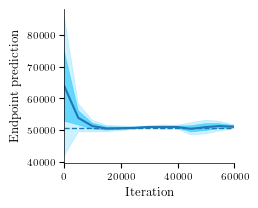

In [20]:
plt.figure(figsize=(2.2, 2))
plt.plot(iterations, Nfs)
plt.fill_between(iterations, Nfs - Nfs_std, Nfs + Nfs_std, alpha=0.5, color='deepskyblue')
plt.fill_between(iterations, Nfs - 2*Nfs_std, Nfs + 2*Nfs_std, alpha=0.2, color='deepskyblue')
plt.axhline(y=Nf_true, lw=1, ls='--')
plt.xlim(0, 60000)
plt.ylabel('Endpoint prediction')
plt.xlabel('Iteration')
plt.savefig('../../../report/figures/gaussian_endpoints.pdf', format='pdf', bbox_inches='tight')

##### Wedding

In [21]:
nlive = 350
samples = pickle_in('bandwidth_endpoints/samples_wedding.pickle')
model = EndModel(samples)
logXf_true = model.logXf_true(100, 0.5)

In [22]:
iterations, logXfs, logXfs_std = pickle_in('bandwidth_endpoints/endpoints_wedding.pickle')
Nfs, Nfs_std = logXfs * (-nlive), logXfs_std * (-nlive)
Nf_true = logXf_true * (-nlive)

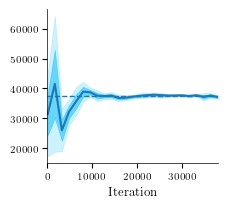

In [23]:
plt.figure(figsize=(2.2, 2))
plt.plot(iterations, Nfs)
plt.fill_between(iterations, Nfs - Nfs_std, Nfs + Nfs_std, alpha=0.5, color='deepskyblue')
plt.fill_between(iterations, Nfs - 2*Nfs_std, Nfs + 2*Nfs_std, alpha=0.2, color='deepskyblue')
plt.axhline(y=Nf_true, lw=1, ls='--')
# plt.ylim(35000, 90000)
plt.xlim(0, 38000)
# plt.ylabel('Endpoint prediction')
plt.xlabel('Iteration')
plt.savefig('../../../report/figures/wedding_endpoints.pdf', format='pdf', bbox_inches='tight')

In [25]:
samples.D_KL()

92.73473769885697